## Google Play Store

### A Google Play (ou como antigamente, Android Market) é o maior serviço de distribuição de aplicativos no mundo, contando com filmes, serviços, e aplicativos. Foi fundada em 28 de agosto de 2008 junto do Google Music, como sabemos, a "loja" da Google vem pré-instalada em todos os smartphones Android, fazendo assim uma hegemonia dos aplicativos para seu próprio sistema operacional, junto a isso, convém analisarmos o presente fluxo de aplicativos presentes na loja.

<img src='images/google-evolution.jpg'>

Vamos nessa?😎

# Table of contents

[1. Loading and preparing data](#1.-Loading-and-preparing-data)

[2. Descriptive Statistics](#2.-Descriptive-Statistics)




### Primeiramente vamos começar importando as bibliotecas que vamos utilizar para as análises e manipulações.

In [1]:
# Pandas para manipulação dos dados
import modin.pandas as pd

# NumPy para manipulação de arrays
import numpy as np 

# matplotlib e seaborn para visualização de dados
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# 1. Loading and preparing data

In [2]:
%%time
data = pd.read_csv('archive/Google-Playstore.csv')

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()

2021-06-28 09:58:05,460	WARNING services.py:1730 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 3778629632 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=4.10gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.


CPU times: user 1.58 s, sys: 1.47 s, total: 3.05 s
Wall time: 23.9 s


In [4]:
print('Quantidade de linhas', data.shape[0])
print('Quantidade de colunas', data.shape[1])

Quantidade de linhas 2312944
Quantidade de colunas 24


In [4]:
data.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [25]:
df_rating.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35
10,Dodge The Cars!,com.MrScratchEnterprises.CarDogeGame,Racing,4.9,55.0,100+,100.0,329,True,0.0,...,NaN,mithalaarush@gmail.com,"Jul 30, 2020","Jul 30, 2020",Everyone,https://docs.google.com/document/d/1HTtvenbfLk...,False,False,False,2021-06-15 20:19:35


In [9]:
df = data[(data['Rating'] > 4) & (data['Minimum Installs'] >= 1e4)]

In [10]:
print('Quantidade de linhas', df.shape[0])
print('Quantidade de colunas', df.shape[1])

Quantidade de linhas 268403
Quantidade de colunas 24


# 2. Descriptive Statistics

### Descriptive Statistics with only rating greater than four.

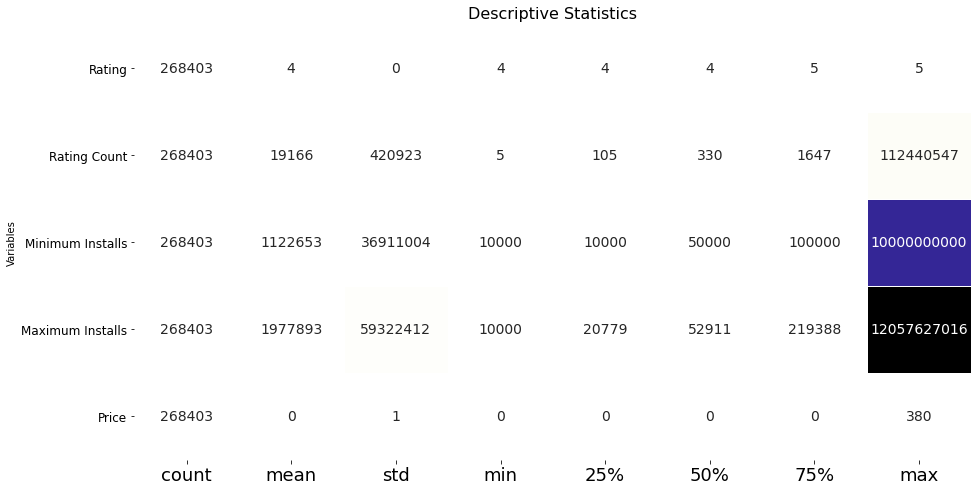

In [33]:
desc = df.describe().T

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(desc, annot=True, cmap='CMRmap_r', fmt='.00f', 
            ax=ax, linewidths=1, cbar=False,
            annot_kws={'size': 14})
plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

### Missing values analysis

In [14]:
(df.isna().sum() / df.shape[0]).sort_values(ascending=False) * 100

Developer Website    26.782488
Privacy Policy       12.357164
Released              1.792826
Minimum Android       0.123695
Developer Email       0.001490
Developer Id          0.000373
App Id                0.000000
Editors Choice        0.000000
In App Purchases      0.000000
Ad Supported          0.000000
Content Rating        0.000000
Last Updated          0.000000
App Name              0.000000
Size                  0.000000
Currency              0.000000
Price                 0.000000
Free                  0.000000
Maximum Installs      0.000000
Minimum Installs      0.000000
Installs              0.000000
Rating Count          0.000000
Rating                0.000000
Category              0.000000
Scraped Time          0.000000
dtype: float64

Info das colunas

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268403 entries, 9 to 2312939
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           268403 non-null  object 
 1   App Id             268403 non-null  object 
 2   Category           268403 non-null  object 
 3   Rating             268403 non-null  float64
 4   Rating Count       268403 non-null  float64
 5   Installs           268403 non-null  object 
 6   Minimum Installs   268403 non-null  float64
 7   Maximum Installs   268403 non-null  int64  
 8   Free               268403 non-null  bool   
 9   Price              268403 non-null  float64
 10  Currency           268403 non-null  object 
 11  Size               268403 non-null  object 
 12  Minimum Android    268071 non-null  object 
 13  Developer Id       268402 non-null  object 
 14  Developer Website  196518 non-null  object 
 15  Developer Email    268399 non-null  object 
 16  R

# 3. Analysis top 100 'Maximum Installs' Downloads